In [22]:
%matplotlib inline

In [23]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Timestamp

import hillmaker as hm

In [3]:
file_stopdata = 'data/unit_stop_log_Experiment1_Scenario1_Rep1.csv'

scenario_name = 'log_unitocc_test_steadystate'
in_fld_name = 'EnteredTS'
out_fld_name = 'ExitedTS'
cat_fld_name = 'Unit'
start_analysis = '6/24/2015 00:00'
end_analysis = '6/16/2016 00:00'

# Optional inputs

tot_fld_name = 'OBTot'
bin_size_mins = 1440
includecats = ['LDR','PP']

df = pd.read_csv(file_stopdata)
basedate = Timestamp('20150215 00:00:00')
df['EnteredTS'] = df.apply(lambda row:
                           Timestamp(round((basedate + pd.DateOffset(hours=row['Entered'])).value,-9)), axis=1)

df['ExitedTS'] = df.apply(lambda row:
                          Timestamp(round((basedate + pd.DateOffset(hours=row['Exited'])).value,-9)), axis=1)

In [4]:
a_start = pd.Timestamp(start_analysis)
a_end = pd.Timestamp(end_analysis)
print(a_start,a_end)

2015-06-24 00:00:00 2016-06-16 00:00:00


In [5]:
left_PP_df = df[(df['EnteredTS'] < a_start) & (a_start <= df['ExitedTS']) &  (df['ExitedTS'] < a_end) & (df['Unit'] == 'PP')]

In [9]:
right_PP_df = df[(a_start <= df['EnteredTS']) & (df['EnteredTS'] < a_end) &  (df['ExitedTS'] >= a_end) & (df['Unit'] == 'PP')]

In [10]:
print(right_PP_df.shape)
right_PP_df[:][['EnteredTS','ExitedTS']]

(37, 17)


,EnteredTS,ExitedTS
25283,2016-06-11 09:09:53,2016-06-16 00:54:04
25286,2016-06-14 10:14:50,2016-06-16 01:21:06
25287,2016-06-14 23:06:20,2016-06-16 02:48:32
25294,2016-06-13 09:06:27,2016-06-16 06:08:35
25297,2016-06-15 03:07:51,2016-06-16 06:53:49
25312,2016-06-15 18:30:35,2016-06-16 13:05:38
25320,2016-06-13 21:05:12,2016-06-16 16:17:26
25327,2016-06-13 22:45:53,2016-06-16 18:11:57
25328,2016-06-14 17:21:16,2016-06-16 18:32:38
25342,2016-06-14 19:21:25,2016-06-16 21:59:03


In [39]:
print(left_PP_df.shape)
left_PP_df[:][['EnteredTS','ExitedTS']]

(30, 17)


,EnteredTS,ExitedTS
6558,2015-06-21 13:54:53,2015-06-24 00:20:17
6562,2015-06-22 13:42:20,2015-06-24 00:44:04
6567,2015-06-22 01:06:01,2015-06-24 04:27:04
6575,2015-06-21 15:20:06,2015-06-24 09:40:08
6576,2015-06-15 17:39:59,2015-06-24 09:47:58
6583,2015-06-20 11:16:04,2015-06-24 13:46:49
6586,2015-06-22 19:32:53,2015-06-24 16:39:49
6590,2015-06-23 20:59:23,2015-06-24 19:16:10
6592,2015-06-19 08:52:54,2015-06-24 19:54:19
6594,2015-06-19 19:10:27,2015-06-24 20:44:15


In [16]:
occ_df = pd.read_csv('testing/occ_stats_summary_log_unitocc_test_steadystate.csv')

In [17]:
bydt_df = pd.read_csv('testing/bydatetime_log_unitocc_test_steadystate.csv')

In [18]:
pp_occ = bydt_df[(bydt_df['category'] == 'PP')]['occupancy']

In [19]:
ldr_occ = bydt_df[(bydt_df['category'] == 'LDR')]['occupancy']

(array([   5.,    8.,   29.,   51.,   78.,  120.,  126.,  139.,  129.,
         109.,   88.,   64.]),
 array([ 20.47921296,  22.60594522,  24.73267747,  26.85940972,
         28.98614198,  31.11287423,  33.23960648,  35.36633873,
         37.49307099,  39.61980324,  41.74653549,  43.87326775,  46.        ]),
 <a list of 12 Patch objects>)

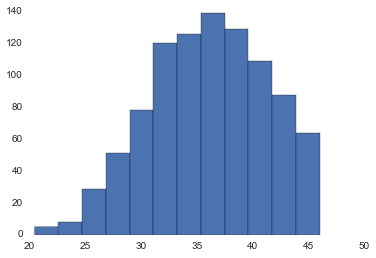

In [28]:
plt.hist(pp_occ.values,12)

(array([  2.,   2.,   6.,  13.,  20.,  27.,  40.,  79.,  87.,  84.,  98.,
         89.,  82.,  84.,  54.,  61.,  42.,  38.,  20.,  18.]),
 array([  2.  ,   2.55,   3.1 ,   3.65,   4.2 ,   4.75,   5.3 ,   5.85,
          6.4 ,   6.95,   7.5 ,   8.05,   8.6 ,   9.15,   9.7 ,  10.25,
         10.8 ,  11.35,  11.9 ,  12.45,  13.  ]),
 <a list of 20 Patch objects>)

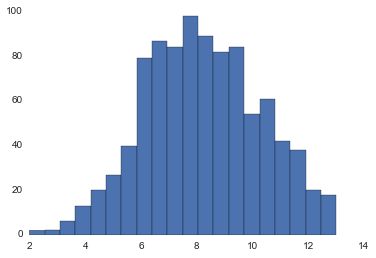

In [25]:
plt.hist(ldr_occ.values,20)

In [29]:
bydt_df.head()

,category,datetime,arrivals,departures,occupancy,day_of_week,bin_of_day,bin_of_week
0,LDR,2015-04-01,13,15,7.006134,2,0,2
1,LDR,2015-04-02,19,10,8.798472,3,0,3
2,LDR,2015-04-03,18,21,10.939572,4,0,4
3,LDR,2015-04-04,13,17,8.559769,5,0,5
4,LDR,2015-04-05,13,13,6.770405,6,0,6


In [51]:
bydt_df['datetime'].min()

'2015-03-24'

In [30]:
pp_occ.describe()

count    946.000000
mean      36.077314
std        5.229958
min       20.479213
25%       32.398484
50%       36.133032
75%       40.049572
max       46.000000
Name: occupancy, dtype: float64

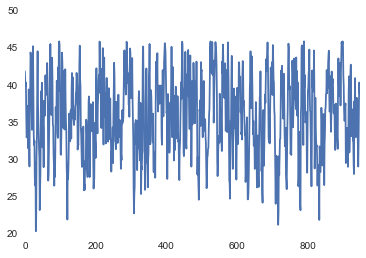

In [31]:
sns.tsplot(pp_occ);

In [32]:
pp_occ.head()

946    41.985243
947    40.804190
948    39.997558
949    40.432025
950    35.925370
Name: occupancy, dtype: float64

In [33]:
occ_df

,category,day_of_week,bin_of_day,count,max,mean,min,p50,p55,p60,p65,p70,p75,p80,p85,p90,p95,p975,p99,stdev
0,LDR,0,0,135,12.891366,7.984419,2.796759,7.720822,8.228215,8.595220,8.831941,9.171532,9.397662,9.869197,10.489184,11.033111,11.783839,12.132996,12.554980,2.181408
1,LDR,1,0,135,13.000000,8.230036,3.474745,8.092384,8.242804,8.470944,8.932141,9.299539,9.580023,9.918157,10.352272,10.915093,11.597917,12.728136,12.902694,2.046906
2,LDR,2,0,136,12.918009,8.144066,2.000000,8.163414,8.338695,8.533981,8.961140,9.328594,9.610564,10.099630,10.491646,10.854664,11.841606,12.358048,12.786104,2.121306
3,LDR,3,0,135,12.875243,8.408280,3.629352,8.463785,8.773997,9.020667,9.242135,9.678604,9.956875,10.488127,10.782909,11.263389,11.737558,12.120885,12.384748,2.098490
4,LDR,4,0,135,12.850544,8.424046,2.375741,8.401725,8.836523,9.129600,9.381046,9.591648,9.927517,10.293407,10.810131,11.301012,11.583255,12.083503,12.166122,2.142989
5,LDR,5,0,135,12.730498,8.138321,3.427373,7.931053,8.195449,8.535616,8.873404,9.068139,9.482662,9.733801,10.411692,10.906898,11.534293,11.949912,12.477259,1.940512
6,LDR,6,0,135,12.798495,8.308331,3.461505,8.316933,8.514780,8.731028,9.122241,9.315606,9.656620,10.069782,10.488385,11.100748,11.840792,12.359170,12.695952,2.039818
7,OBTot,0,0,135,58.312072,44.240580,32.207986,44.938137,45.654442,46.086981,46.621472,47.173657,47.777378,49.067007,50.312773,51.346285,53.838125,55.698014,56.525428,5.763216
8,OBTot,1,0,135,59.000000,44.509344,29.828657,45.239167,46.273299,46.602109,47.166617,47.507778,48.425787,49.093884,50.310515,52.097472,53.868200,54.859369,56.294068,5.859946
9,OBTot,2,0,136,58.326308,44.650573,29.872940,45.185909,46.155315,46.753565,47.937468,48.680897,49.369057,50.428646,50.892355,52.050064,53.626707,56.587617,57.801300,6.279447
